Plotting the data

In [1]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 124.5 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

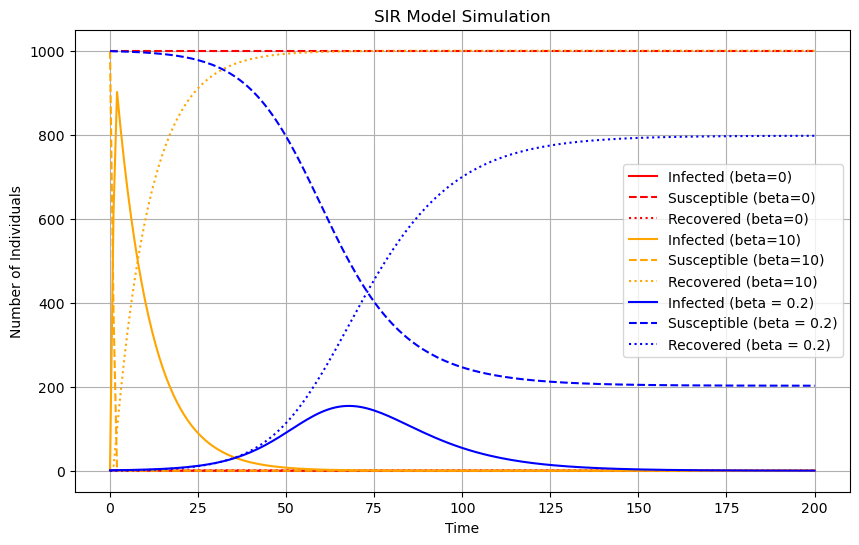

In [3]:
#Get data from filename_beta0_dt0p100000.csv

#columns are Time, Infected, Susceptible, Recovered

def get_data(filename):
    data = np.loadtxt(filename, delimiter=',', skiprows=1)
    time = data[:,0]
    infected = data[:,1]
    susceptible = data[:,2]
    recovered = data[:,3]
    return time, infected, susceptible, recovered

#use on module1/data/filename_beta0_dt0p100000.csv and module1/data/filename_beta10_dt0p100000.csv and module1/data/filename_dt0p100000.csv

d1 = get_data('data/filename_beta0_dt0p100000.csv')
d2 = get_data('data/filename_beta10_dt0p100000.csv')
d3 = get_data('data/filename_dt0p100000.csv')
t1, inf1, sus1, rec1 = d1
t2, inf2, sus2, rec2 = d2
t3, inf3, sus3, rec3 = d3

#plotting both on same graph
plt.figure(figsize=(10,6))
plt.plot(t1, inf1, label='Infected (beta=0)', color='red')
plt.plot(t1, sus1, label='Susceptible (beta=0)', color='red', linestyle='--')
plt.plot(t1, rec1, label='Recovered (beta=0)', color='red', linestyle=':')
plt.plot(t2, inf2, label='Infected (beta=10)', color='orange')
plt.plot(t2, sus2, label='Susceptible (beta=10)', color='orange', linestyle='--')
plt.plot(t2, rec2, label='Recovered (beta=10)', color='orange', linestyle=':')
plt.plot(t3, inf3, label='Infected (beta = 0.2)', color='blue')
plt.plot(t3, sus3, label='Susceptible (beta = 0.2)', color='blue', linestyle='--')
plt.plot(t3, rec3, label='Recovered (beta = 0.2)', color='blue', linestyle=':')
plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.title('SIR Model Simulation')
plt.legend()
plt.grid()
plt.show()



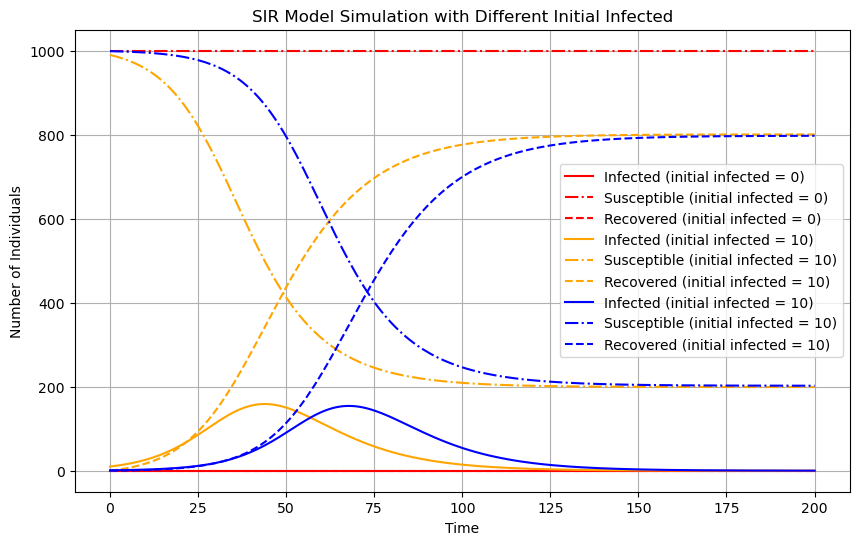

In [4]:
# get module1/data/filename_infected0_dt0p100000.csv
# get module1/data/filename_infected10_dt0p100000.csv



data1 = get_data('data/filename_infected0_dt0p100000.csv')
data2 = get_data('data/filename_infected10_dt0p100000.csv')
t1, inf1, sus1, rec1 = data1
t2, inf2, sus2, rec2 = data2
#plotting both and d3 on same graph
plt.figure(figsize=(10,6))
plt.plot(t1, inf1, label='Infected (initial infected = 0)', color='red')
plt.plot(t1, sus1, label='Susceptible (initial infected = 0)', color='red', linestyle='-.')
plt.plot(t1, rec1, label='Recovered (initial infected = 0)', color='red', linestyle='--')
plt.plot(t2, inf2, label='Infected (initial infected = 10)', color='orange')
plt.plot(t2, sus2, label='Susceptible (initial infected = 10)', color='orange', linestyle='-.')
plt.plot(t2, rec2, label='Recovered (initial infected = 10)', color='orange', linestyle='--')
plt.plot(t3, inf3, label='Infected (initial infected = 10)', color='blue')
plt.plot(t3, sus3, label='Susceptible (initial infected = 10)', color='blue', linestyle='-.')
plt.plot(t3, rec3, label='Recovered (initial infected = 10)', color='blue', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.title('SIR Model Simulation with Different Initial Infected')
plt.legend()
plt.grid()
plt.show()


In [5]:
base_path = 'data/'

filenames = [
    'filename_dt0p000001.csv',
    'filename_dt0p000010.csv',
    'filename_dt0p000100.csv',
    'filename_dt0p001000.csv',
    'filename_dt0p010000.csv',
    'filename_dt0p100000.csv',
    'filename_dt1p000000.csv'
]

data = {}

for filename in filenames:
    t, inf, sus, rec = get_data(base_path + filename)

    dt = filename.split('dt')[1].replace('.csv', '').replace('p', '.')

    data[dt] = {
        't': t,
        'S': sus,
        'I': inf,
        'R': rec
    }


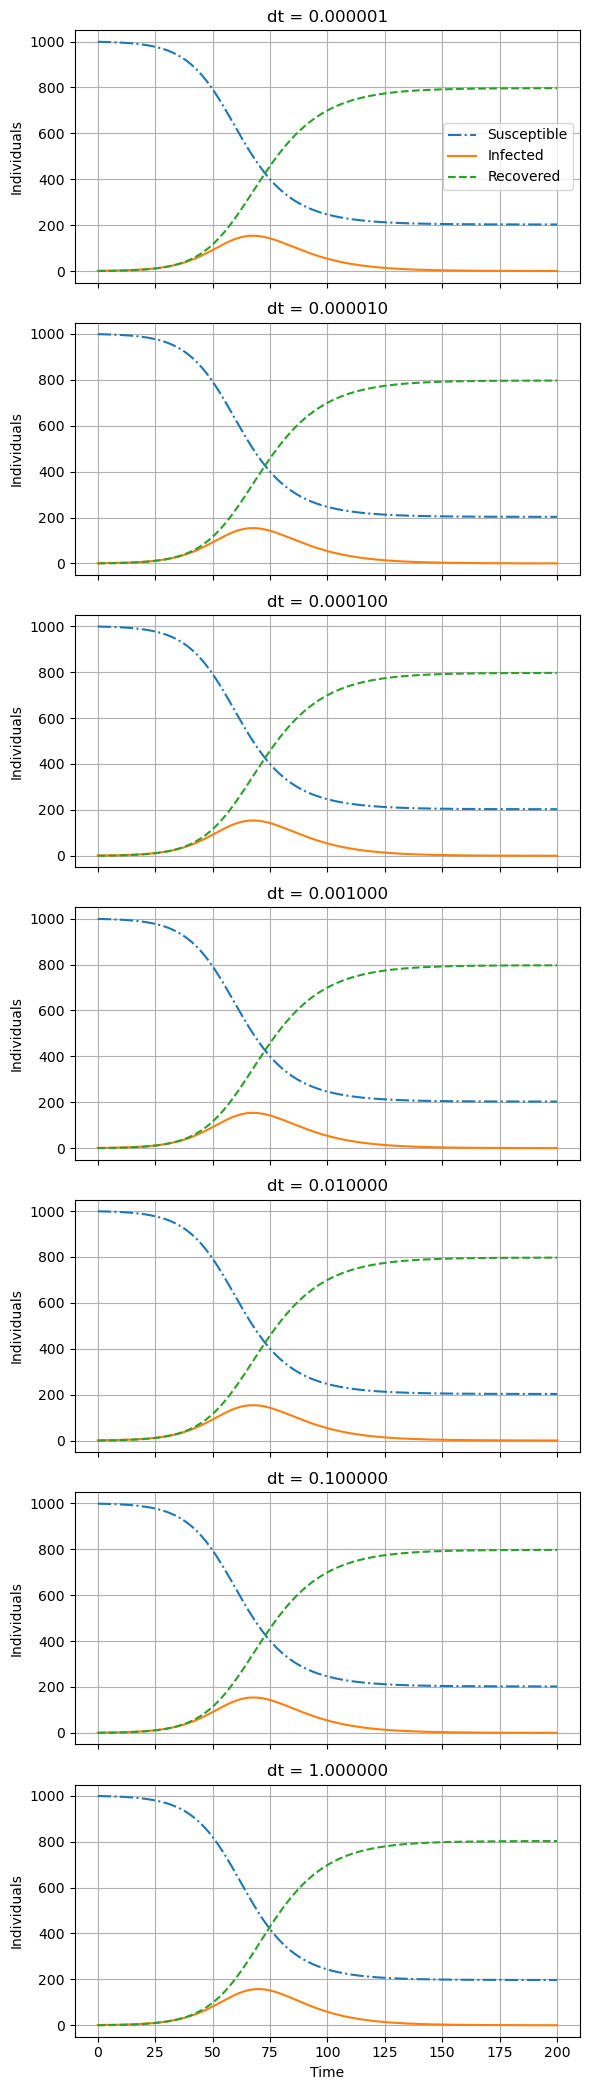

In [6]:
n = len(data)

fig, axes = plt.subplots(n, 1, figsize=(6, 3*n), sharex=True)

if n == 1:
    axes = [axes]

for ax, (dt, d) in zip(axes, data.items()):
    ax.plot(d['t'], d['S'], label='Susceptible', linestyle='-.')
    ax.plot(d['t'], d['I'], label='Infected')
    ax.plot(d['t'], d['R'], label='Recovered', linestyle='--')

    ax.set_title(f'dt = {dt}')
    ax.set_ylabel('Individuals')
    ax.grid()

axes[-1].set_xlabel('Time')
axes[0].legend()

plt.tight_layout()
plt.show()


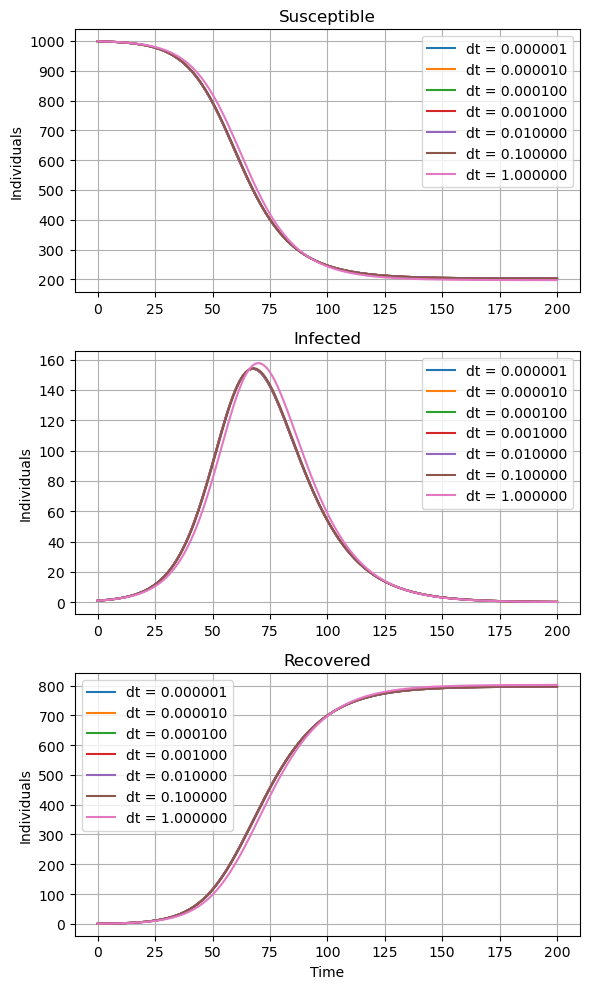

In [7]:
plt.figure(figsize=(6, 10))

# --- Susceptible ---
plt.subplot(3, 1, 1)
for dt, d in data.items():
    plt.plot(d['t'], d['S'], label=f'dt = {dt}')
plt.title('Susceptible')
plt.ylabel('Individuals')
plt.legend()
plt.grid()

# --- Infected ---
plt.subplot(3, 1, 2)
for dt, d in data.items():
    plt.plot(d['t'], d['I'], label=f'dt = {dt}')
plt.title('Infected')
plt.ylabel('Individuals')
plt.legend()
plt.grid()

# --- Recovered ---
plt.subplot(3, 1, 3)
for dt, d in data.items():
    plt.plot(d['t'], d['R'], label=f'dt = {dt}')
plt.title('Recovered')
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


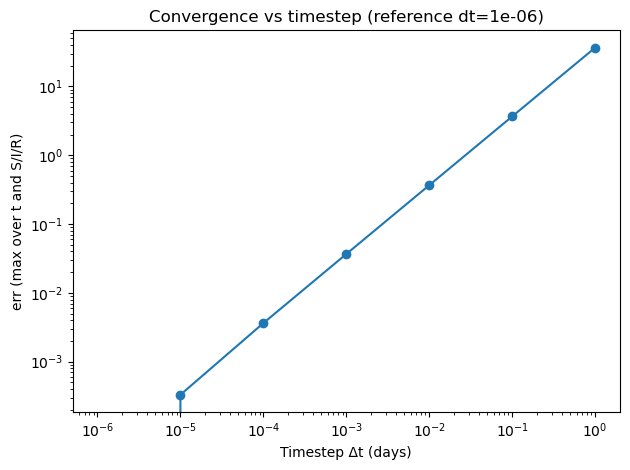

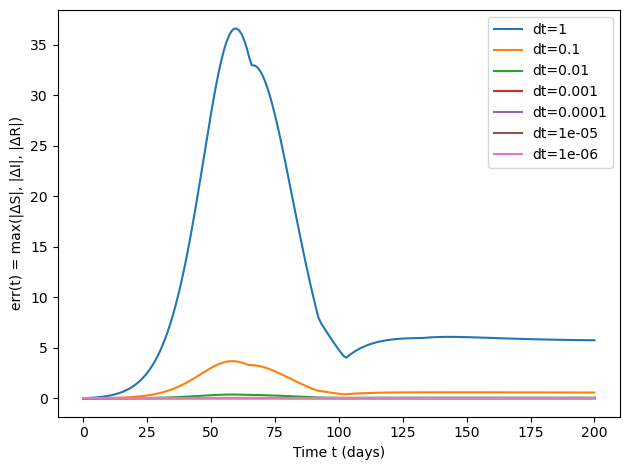

In [8]:

# reference = smallest dt

fname_ref = filenames[0]
dt_ref = float(fname_ref.split('dt')[1].replace('.csv', '').replace('p', '.'))
df_ref = pd.read_csv(base_path + fname_ref)

t_ref = df_ref["Time"].to_numpy()
S_ref = df_ref["Susceptibile"].to_numpy()
I_ref = df_ref["Infected"].to_numpy()
R_ref = df_ref["Recovered"].to_numpy()

# err(dt): maximal disagreement over time and variables
dts = []
errs = []

# also store err(t) for two cases
fname_large = filenames[-1]
dt_large = float(fname_large.split('dt')[1].replace('.csv', '').replace('p', '.'))

fname_small = filenames[1] if len(filenames) > 1 else filenames[0]
dt_small = float(fname_small.split('dt')[1].replace('.csv', '').replace('p', '.'))



def err_time_series(df, t_ref, S_ref, I_ref, R_ref):
    t = df["Time"].to_numpy()
    if len(t) != len(t_ref) or not np.allclose(t, t_ref, rtol=0, atol=1e-12):
        raise ValueError("Time grids do not match. Check write frequency / dt divisibility.")
    S = df["Susceptibile"].to_numpy()
    I = df["Infected"].to_numpy()
    R = df["Recovered"].to_numpy()
    e_t = np.maximum.reduce([
        np.abs(S - S_ref),
        np.abs(I - I_ref),
        np.abs(R - R_ref)
    ])
    return t, e_t



#iterate over filenames

for fname in filenames:
    dt = float(fname.split('dt')[1].replace('.csv', '').replace('p', '.'))
    df = pd.read_csv(base_path + fname)

    t = df["Time"].to_numpy()
    if len(t) != len(t_ref) or not np.allclose(t, t_ref, rtol=0, atol=1e-12):
        raise ValueError(f"Time grid mismatch for dt={dt}. Fix output cadence.")

    S = df["Susceptibile"].to_numpy()
    I = df["Infected"].to_numpy()
    R = df["Recovered"].to_numpy()

    e_t = np.maximum.reduce([
        np.abs(S - S_ref),
        np.abs(I - I_ref),
        np.abs(R - R_ref)
    ])
    e = np.max(e_t)

    dts.append(dt)
    errs.append(e)

dts = np.array(dts)
errs = np.array(errs)


# Plot err vs dt

plt.figure()
plt.loglog(dts, errs, marker="o")
plt.xlabel("Timestep Δt (days)")
plt.ylabel("err (max over t and S/I/R)")
plt.title(f"Convergence vs timestep (reference dt={dt_ref:g})")
plt.tight_layout()
plt.savefig("figs/err_vs_dt.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot err(t) for all dt

plt.figure()
for i in range(len(filenames)):
    fname = filenames[-i-1]
    dt = float(fname.split('dt')[1].replace('.csv', '').replace('p', '.'))
    df = pd.read_csv(base_path + fname)
    t, e_t = err_time_series(df, t_ref, S_ref, I_ref, R_ref)
    plt.plot(t, e_t, label=f"dt={dt:g}")


plt.xlabel("Time t (days)")
plt.ylabel("err(t) = max(|ΔS|, |ΔI|, |ΔR|)")
plt.legend()
plt.tight_layout()
plt.savefig("figs/err_vs_time.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
import glob, os
print(os.getcwd())
print(glob.glob("SIR_python*.so"))

import SIR_python
print("Imported:", SIR_python)
df = pd.read_csv("Unknown_SIR_data.csv")
df.columns = df.columns.str.strip()

t_data = df["Unnamed: 0"].to_numpy()
S_data = df["S"].to_numpy()
I_data = df["I"].to_numpy()
R_data = df["R"].to_numpy()

S0 = float(S_data[0])
I0 = float(I_data[0])
R0 = float(R_data[0])
N0 = S0 + I0 + R0

t_end = float(t_data[-1])

dt_data = float(t_data[1] - t_data[0])
dt_internal = dt_data / 10.0 

/home/jovyan/erda_mount/HPPC_course/module1
['SIR_python.cpython-312-x86_64-linux-gnu.so']
Imported: <module 'SIR_python' from '/home/jovyan/erda_mount/HPPC_course/module1/SIR_python.cpython-312-x86_64-linux-gnu.so'>


In [10]:
def simulate_at_data_times(beta, gamma):
    num_steps = int(np.ceil(t_end / dt_internal))
    return_every = 1  # output every internal step

    out = SIR_python.integrate_system(S0, I0, R0, beta, gamma,
                                      dt_internal, num_steps, return_every)
    t_m = out[:, 0]
    S_m = out[:, 1]
    I_m = out[:, 2]
    R_m = out[:, 3]

    # interpolate model to the data times
    S_fit = np.interp(t_data, t_m, S_m)
    I_fit = np.interp(t_data, t_m, I_m)
    R_fit = np.interp(t_data, t_m, R_m)
    return S_fit, I_fit, R_fit

In [11]:
def loss(beta, gamma):
    S_fit, I_fit, R_fit = simulate_at_data_times(beta, gamma)

    # Reject unstable / unphysical runs (prevents overflow)
    if (not np.all(np.isfinite(S_fit)) or not np.all(np.isfinite(I_fit)) or not np.all(np.isfinite(R_fit))):
        return np.inf
    if (S_fit.min() < -1e-6) or (I_fit.min() < -1e-6) or (R_fit.min() < -1e-6):
        return np.inf
    if np.max(S_fit + I_fit + R_fit) > 2.0 * N0:   # exploded population
        return np.inf

    # normalized least squares
    S_dn = S_data / N0; I_dn = I_data / N0; R_dn = R_data / N0
    S_fn = S_fit  / N0; I_fn = I_fit  / N0; R_fn = R_fit  / N0

    err = (S_fn - S_dn)**2 + (I_fn - I_dn)**2 + (R_fn - R_dn)**2
    if not np.all(np.isfinite(err)):
        return np.inf
    return float(np.mean(err))

In [12]:
betas = np.logspace(-3, 1, 60)   # 1e-3 .. 10
gammas = np.logspace(-3, 1, 60)  # 1e-3 .. 10

best_beta, best_gamma, best_L = None, None, np.inf
for b in betas:
    for g in gammas:
        L = loss(b, g)
        if L < best_L:
            best_beta, best_gamma, best_L = b, g, L

# refine around best (factor 3 window)
betas2 = np.logspace(np.log10(best_beta/3), np.log10(best_beta*3), 60)
gammas2 = np.logspace(np.log10(best_gamma/3), np.log10(best_gamma*3), 60)

for b in betas2:
    for g in gammas2:
        L = loss(b, g)
        if L < best_L:
            best_beta, best_gamma, best_L = b, g, L

print(f"Fit results: beta={best_beta:.6g}, gamma={best_gamma:.6g}, loss={best_L:.6g}")

Fit results: beta=0.249541, gamma=0.077111, loss=0.00019481


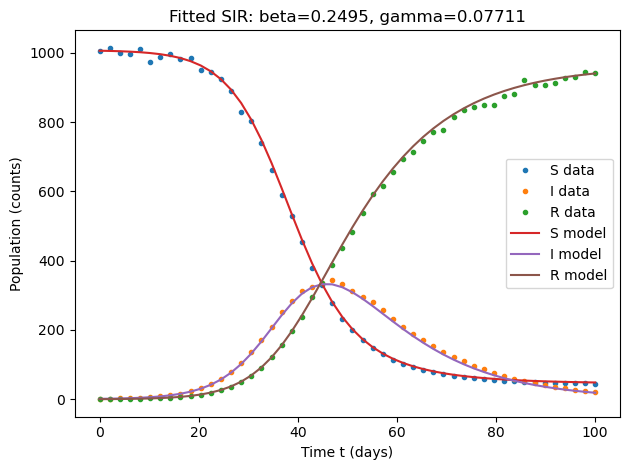

In [13]:
S_fit, I_fit, R_fit = simulate_at_data_times(best_beta, best_gamma)

os.makedirs("figs", exist_ok=True)

plt.figure()
plt.plot(t_data, S_data, "o", ms=3, label="S data")
plt.plot(t_data, I_data, "o", ms=3, label="I data")
plt.plot(t_data, R_data, "o", ms=3, label="R data")

plt.plot(t_data, S_fit, "-", label="S model")
plt.plot(t_data, I_fit, "-", label="I model")
plt.plot(t_data, R_fit, "-", label="R model")

plt.xlabel("Time t (days)")
plt.ylabel("Population (counts)")
plt.title(f"Fitted SIR: beta={best_beta:.4g}, gamma={best_gamma:.4g}")
plt.legend()
plt.tight_layout()
plt.savefig("figs/sir_fit_unknown_data.png", dpi=300, bbox_inches="tight")
plt.show()